In [65]:
import pandas as pd
import pandasql as ps
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


import geopandas as gpd
# import psycopg2
# import plotly.express as px

In [2]:
# Higher square footage increases home sale price

In [135]:
dfAll = pd.read_csv("../../references/dfAll.csv")

In [4]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=dfAll).fit()

In [5]:
# fsuckym.summary()
dfAll['Wfnt'] = dfAll['WfntLocation'] >0

In [6]:
# Taking only Single Family Residences between 50000 and 1000000
q2 = ("""
SELECT * 
FROM dfAll
WHERE PropertyType = 11 and SalePrice > 50000 and SalePrice < 10000000 and SqFtTotLiving < 8000
""")
dfAll2 = ps.sqldf(q2)

In [7]:
ssuckym = ols(formula="SalePrice ~ SqFtTotLiving + ZipCode + Wfnt ", data=dfAll2).fit()

In [8]:
ssuckym.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     248.5
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:53:56   Log-Likelihood:            -2.3847e+05
No. Observations:               17024   AIC:                         4.773e+05
Df Residuals:                   16855   BIC:                         4.786e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.231e+05   2.95e+05      0.757      0.449   -3.55e+05    8.01e+05
ZipCode[T.98]           5.84e+05   3.61e+05      1.617      0.106   -1.24e+05    1.29e+06
ZipCode[T.98001]      -3.685e+05   2.95e+05     -1.248      0.212   -9.47e+05     2.1e+05
ZipCode[T.98001.0]    -4.501e+05   2.99e+05     -1.505      0.132   -1.04e+06    1.36e+05
ZipCode[T.98002]      -3.292e+05   2.96e+05     -1.114      0.265   -9.08e+05     2.5e+05
ZipCode[T.98002.0]    -3.503e+05   3.04e+05     -1.153      0.249   -9.46e+05    2.45e+05
ZipCode[T.98003]      -3.438e+05   2.95e+05     -1.164      0.245   -9.23e+05    2.35e+05
ZipCode[T.98003.0]     -3.61e+05   2.98e+05     -1.213      0.225   -9.44e+05    2.22e+05
ZipCode[T.98004]       1.161e+06   2.96e+05      3.929      0.000    5.82e+05    1.74e+06
ZipCode[T.98004.0]      1.38e+06      3e+05      4.599      0.000    7.92e+05    1.97e+06
ZipCode[T.98005]         3.6e+05   2.96e+05      1.215      0.224   -2.21e+05    9.41e+05
ZipCode[T.98005.0]     1.064e+05   3.07e+05      0.347      0.729   -4.95e+05    7.08e+05
ZipCode[T.98006]       1.195e+05   2.95e+05      0.405      0.686   -4.59e+05    6.98e+05
ZipCode[T.98006.0]     2.125e+05   2.99e+05      0.712      0.477   -3.73e+05    7.98e+05
ZipCode[T.98007]       6.695e+04   2.96e+05      0.226      0.821   -5.14e+05    6.48e+05
ZipCode[T.98007.0]     1.683e+05   3.23e+05      0.521      0.602   -4.65e+05    8.01e+05
ZipCode[T.98008]       1.093e+05   2.95e+05      0.370      0.711    -4.7e+05    6.89e+05
ZipCode[T.98008.0]     9373.5107   3.06e+05      0.031      0.976    -5.9e+05    6.09e+05
ZipCode[T.98010]      -4.007e+05   2.98e+05     -1.346      0.178   -9.84e+05    1.83e+05
ZipCode[T.98010.0]    -7.087e+05    3.3e+05     -2.149      0.032   -1.36e+06   -6.24e+04
ZipCode[T.98011]      -1.656e+05   2.96e+05     -0.560      0.576   -7.45e+05    4.14e+05
ZipCode[T.98011.0]     -1.69e+05   3.06e+05     -0.552      0.581   -7.69e+05    4.31e+05
ZipCode[T.98014]      -1.854e+05   2.97e+05     -0.625      0.532   -7.67e+05    3.96e+05
ZipCode[T.98014.0]     5.257e+05    3.4e+05      1.544      0.123   -1.42e+05    1.19e+06
ZipCode[T.98019]      -2.143e+05   2.96e+05     -0.724      0.469   -7.95e+05    3.66e+05
ZipCode[T.98019.0]    -3.496e+05    3.3e+05     -1.061      0.289   -9.96e+05    2.96e+05
ZipCode[T.98022]      -3.429e+05   2.96e+05     -1.160      0.246   -9.22e+05    2.36e+05
ZipCode[T.98022.0]     -4.11e+05      3e+05     -1.371      0.171   -9.99e+05    1.77e+05
ZipCode[T.98023]      -4.191e+05   2.95e+05     -1.420      0.156   -9.98e+05    1.59e+05
ZipCode[T.98023-7841] -3.609e+05   4.17e+05     -0.866      0.387   -1.18e+06    4.56e+05
ZipCode[T.98023.0]    -3.346e+05   2.99e+05     -1.120      0.263    -9.2e+05    2.51e+05
ZipCode[T.98024]      -

In [9]:
pvc_df = dfAll2[['SalePrice','ZipCode','SqFtTotLiving']]
pvc_df.dropna(inplace=True)

<ipython-input-9-cc3b41619312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df.dropna(inplace=True)


In [10]:
pvc_df

,SalePrice,ZipCode,SqFtTotLiving
0,560000,98019,1930.0
1,435000,98038,1975.0
2,775000,98177,2080.0
4,1255000,98006,2680.0
5,400000,98030,2540.0
...,...,...,...
19603,835000,98126,2380.0
19605,700988,98058,2790.0
19606,1550000,98040,3830.0
19607,930000,98116,2600.0


In [11]:
pvc_df['ZipCodeFix'] = pvc_df['ZipCode'].str.split('-').str[0]
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(float)
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(str)
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].str.split('.').str[0]
pvc_df['Wfnt'] = dfAll['Wfnt']


<ipython-input-11-b549e84204aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df['ZipCodeFix'] = pvc_df['ZipCode'].str.split('-').str[0]
<ipython-input-11-b549e84204aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(float)
<ipython-input-11-b549e84204aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [12]:
stupid = pd.DataFrame(ols(formula="SalePrice ~ SqFtTotLiving + ZipCodeFix", data=pvc_df).fit().params)

In [13]:
# stupid[0] = stupid[0].astype(str)
# stupid.to_csv('test.csv')

In [14]:
ols(formula="SalePrice ~ SqFtTotLiving + ZipCodeFix", data=pvc_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     378.1
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:53:57   Log-Likelihood:            -2.4022e+05
No. Observations:               17024   AIC:                         4.806e+05
Df Residuals:                   16941   BIC:                         4.813e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.961e+05   3.26e+05      0.602      0.547   -4.43e+05    8.35e+05
ZipCodeFix[T.98]      5.62e+05   3.99e+05      1.408      0.159    -2.2e+05    1.34e+06
ZipCodeFix[T.98001] -3.571e+05   3.26e+05     -1.094      0.274   -9.97e+05    2.83e+05
ZipCodeFix[T.98002] -3.002e+05   3.27e+05     -0.919      0.358    -9.4e+05     3.4e+05
ZipCodeFix[T.98003]  -3.44e+05   3.26e+05     -1.054      0.292   -9.84e+05    2.96e+05
ZipCodeFix[T.98004]  1.221e+06   3.27e+05      3.737      0.000     5.8e+05    1.86e+06
ZipCodeFix[T.98005]  3.222e+05   3.27e+05      0.984      0.325    -3.2e+05    9.64e+05
ZipCodeFix[T.98006]  1.421e+05   3.26e+05      0.435      0.663   -4.98e+05    7.82e+05
ZipCodeFix[T.98007]   7.19e+04   3.28e+05      0.219      0.826    -5.7e+05    7.14e+05
ZipCodeFix[T.98008]  1.513e+05   3.27e+05      0.463      0.643   -4.89e+05    7.92e+05
ZipCodeFix[T.98010] -2.669e+05   3.29e+05     -0.811      0.417   -9.12e+05    3.78e+05
ZipCodeFix[T.98011] -1.549e+05   3.27e+05     -0.474      0.636   -7.96e+05    4.86e+05
ZipCodeFix[T.98014] -6.796e+04   3.28e+05     -0.207      0.836   -7.11e+05    5.75e+05
ZipCodeFix[T.98019] -2.122e+05   3.27e+05     -0.648      0.517   -8.54e+05    4.29e+05
ZipCodeFix[T.98022] -3.273e+05   3.27e+05     -1.002      0.316   -9.68e+05    3.13e+05
ZipCodeFix[T.98023] -3.888e+05   3.26e+05     -1.192      0.233   -1.03e+06    2.51e+05
ZipCodeFix[T.98024] -9.616e+04   3.29e+05     -0.292      0.770   -7.41e+05    5.49e+05
ZipCodeFix[T.98027] -6.534e+04   3.27e+05     -0.200      0.841   -7.06e+05    5.75e+05
ZipCodeFix[T.98028] -1.576e+05   3.27e+05     -0.482      0.630   -7.98e+05    4.83e+05
ZipCodeFix[T.98029] -8698.2054   3.27e+05     -0.027      0.979   -6.49e+05    6.32e+05
ZipCodeFix[T.98030] -3.373e+05   3.27e+05     -1.033      0.302   -9.78e+05    3.03e+05
ZipCodeFix[T.98031]  -3.26e+05   3.26e+05     -0.999      0.318   -9.66e+05    3.14e+05
ZipCodeFix[T.98032] -3.476e+05   3.27e+05     -1.062      0.288   -9.89e+05    2.94e+05
ZipCodeFix[T.98033]  3.237e+05   3.26e+05      0.991      0.321   -3.16e+05    9.64e+05
ZipCodeFix[T.98034]  2328.0220   3.26e+05      0.007      0.994   -6.37e+05    6.42e+05
ZipCodeFix[T.98038]  -3.01e+05   3.26e+05     -0.923      0.356   -9.41e+05    3.39e+05
ZipCodeFix[T.98039]  2.015e+06   3.31e+05      6.084      0.000    1.37e+06    2.66e+06
ZipCodeFix[T.98040]  6.559e+05   3.27e+05      2.008      0.045    1.57e+04     1.3e+06
ZipCodeFix[T.98042] -3.369e+05   3.26e+05     -1.033      0.302   -9.76e+05    3.03e+05
ZipCodeFix[T.98045] -1.818e+05   3.27e+05     -0.557      0.578   -8.22e+05    4.59e+05
ZipCodeFix[T.98047] -2.766e+05   3.31e+05     -0.837      0.403   -9.25e+05    3.72e+05
ZipCodeFix[T.98050] -1.279e+05   3.48e+05     -0.367      0.714   -8.11e+05    5.55e+05
Zip

In [15]:
sf = "///Users/timothycummins/Downloads/tl_2019_us_zcta510"
dbsf = gpd.read_file(sf)
dbsf['ZipCodeFix'] = dbsf['ZCTA5CE10'].copy()

In [16]:
mergeddf = pd.merge(pvc_df,dbsf,how = 'left', on = 'ZipCodeFix')

In [17]:
mergeddf = mergeddf.drop(columns=['GEOID10','CLASSFP10','MTFCC10','FUNCSTAT10','AWATER10','ALAND10'])

In [18]:
mergeddf

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,Wfnt,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry
0,560000,98019,1930.0,98019,False,98019,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7..."
1,435000,98038,1975.0,98038,False,98038,+47.4193780,-121.9580080,"MULTIPOLYGON (((-122.03567 47.45110, -122.0356..."
2,775000,98177,2080.0,98177,False,98177,+47.7423108,-122.3766354,"POLYGON ((-122.39883 47.77794, -122.39497 47.7..."
3,1255000,98006,2680.0,98006,False,98006,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5..."
4,400000,98030,2540.0,98030,False,98030,+47.3672135,-122.1980509,"POLYGON ((-122.23111 47.38665, -122.22989 47.3..."
...,...,...,...,...,...,...,...,...,...
17019,835000,98126,2380.0,98126,False,98126,+47.5556468,-122.3795899,"POLYGON ((-122.39995 47.59078, -122.39678 47.5..."
17020,700988,98058,2790.0,98058,False,98058,+47.4427368,-122.1239733,"POLYGON ((-122.18656 47.42391, -122.18655 47.4..."
17021,1550000,98040,3830.0,98040,False,98040,+47.5640042,-122.2312143,"POLYGON ((-122.26683 47.58737, -122.26672 47.5..."
17022,930000,98116,2600.0,98116,False,98116,+47.5742452,-122.4002222,"POLYGON ((-122.42494 47.57829, -122.42319 47.5..."


In [19]:
zipcoef = pd.read_csv("./test_reply.csv")
zipcoef['ZipCodeFix'] = zipcoef['ZipCodeFix'].astype(str)

In [20]:
mergeddf2 = pd.merge(mergeddf,zipcoef,how = 'left', on = 'ZipCodeFix')

In [21]:
mergeddf2['coef'] = mergeddf2['coef'].astype(float)
mergeddf2.dropna(inplace=True) 
mergeddf2['coef'] = mergeddf2['coef'].astype(int)
mergeddf2

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,Wfnt,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry,coef,city,urban
0,560000,98019,1930.0,98019,False,98019,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",-213859,Duvall,0.0
1,435000,98038,1975.0,98038,False,98038,+47.4193780,-121.9580080,"MULTIPOLYGON (((-122.03567 47.45110, -122.0356...",-301110,Maple Valley,0.0
2,775000,98177,2080.0,98177,False,98177,+47.7423108,-122.3766354,"POLYGON ((-122.39883 47.77794, -122.39497 47.7...",26666,Seattle,1.0
3,1255000,98006,2680.0,98006,False,98006,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",139417,Bellevue,1.0
4,400000,98030,2540.0,98030,False,98030,+47.3672135,-122.1980509,"POLYGON ((-122.23111 47.38665, -122.22989 47.3...",-336256,Kent,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17019,835000,98126,2380.0,98126,False,98126,+47.5556468,-122.3795899,"POLYGON ((-122.39995 47.59078, -122.39678 47.5...",1888,Seattle,1.0
17020,700988,98058,2790.0,98058,False,98058,+47.4427368,-122.1239733,"POLYGON ((-122.18656 47.42391, -122.18655 47.4...",-299086,Renton,1.0
17021,1550000,98040,3830.0,98040,False,98040,+47.5640042,-122.2312143,"POLYGON ((-122.26683 47.58737, -122.26672 47.5...",637124,Mercer Island,1.0
17022,930000,98116,2600.0,98116,False,98116,+47.5742452,-122.4002222,"POLYGON ((-122.42494 47.57829, -122.42319 47.5...",160355,Seattle,1.0


In [22]:

merge3 = pd.merge(dbsf,zipcoef,how = 'left', on = 'ZipCodeFix')
merge3['coef'] = merge3['coef'].astype(float)
merge3.dropna(inplace=True) 
merge3['coef'] = merge3['coef'].astype(int)

merge3

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,ZipCodeFix,coef,city,urban
11481,98354,98354,B5,G6350,S,6213217,103929,+47.2517603,-122.3127079,"POLYGON ((-122.33656 47.24504, -122.33628 47.2...",98354,-330620,Milton,1.0
17008,98014,98014,B5,G6350,S,117330511,4642171,+47.6619712,-121.8919654,"POLYGON ((-122.00562 47.70899, -122.00439 47.7...",98014,-67379,Carnation,0.0
17009,98019,98019,B5,G6350,S,198160630,2138510,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",98019,-213859,Duvall,0.0
17351,98022,98022,B5,G6350,S,1050783148,7196209,+47.2160682,-122.1139056,"POLYGON ((-122.11589 47.21625, -122.11580 47.2...",98022,-332845,Enumclaw,1.0
17352,98023,98023,B5,G6350,S,26760247,3619040,+47.3114910,-122.3628100,"MULTIPOLYGON (((-122.34200 47.32465, -122.3419...",98023,-392387,Federal Way,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31855,98006,98006,B5,G6350,S,27737341,1886298,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",98006,139417,Bellevue,1.0
31856,98007,98007,B5,G6350,S,11351701,25498,+47.6138254,-122.1443652,"POLYGON ((-122.15494 47.58463, -122.15468 47.5...",98007,60045,Bellevue,1.0
31857,98008,98008,B5,G6350,S,14306585,7402350,+47.6056618,-122.0993535,"POLYGON ((-122.13759 47.57975, -122.13757 47.5...",98008,148974,Bellevue,1.0
31858,98010,98010,B5,G6350,S,38972441,2630481,+47.3119904,-122.0005030,"POLYGON ((-122.05445 47.31796, -122.05425 47.3...",98010,-265527,Black Diamond,0.0


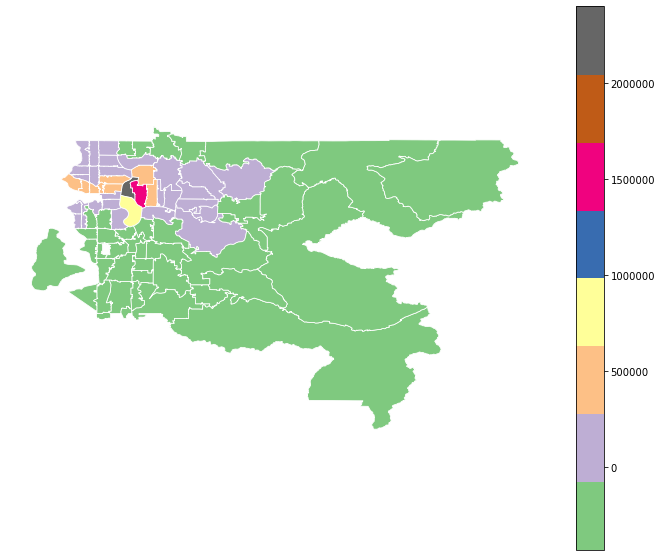

In [23]:
# plt.rcParams['figure.figsize'] = [10, 10] #height, width

vmin, vmax = -430000, 2400000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12,10))

# remove the axis
ax.axis('off')

# add a title and annotation
# ax.set_title('''\nCount of 'Opportunity Youth' \n in South King County \n \n''', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Accent', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

cbar = fig.colorbar(sm)

# create map
merge3.plot(column = (merge3['coef']), cmap='Accent', linewidth=0.8, ax=ax, edgecolor='1')
# Add Labels
merge3['coords'] = merge3['geometry'].apply(lambda x: x.representative_point().coords[:])
merge3['coords'] = [coords[0] for coords in merge3['coords']]

# Display names 
# for idx, row in merge3.iterrows():
    # plt.annotate(s=row['OYP'], xy=row['coords'],horizontalalignment='center',fontsize=5)
#     plt.annotate(s=row['city'], xy=row['coords'],horizontalalignment='center',fontsize=10)

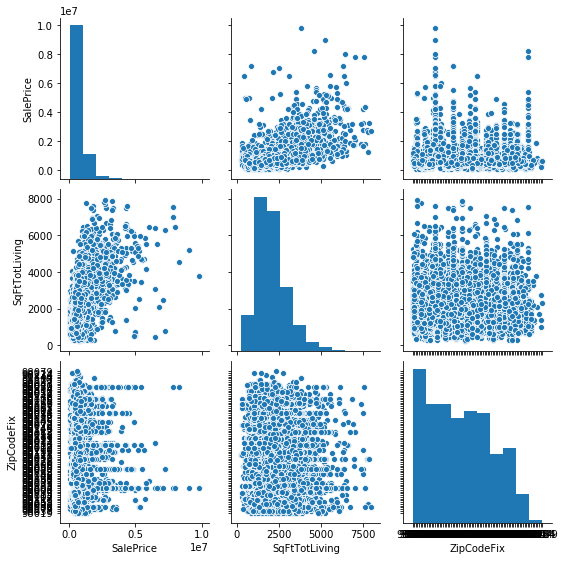

In [24]:
cols = [
    'SalePrice', 'SqFtTotLiving', 'ZipCodeFix'
    
]
colsdf = pvc_df[cols]
sns.pairplot(colsdf)

In [31]:
ols(formula="SalePrice ~ SqFtTotLiving + city", data=mergeddf2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     722.0
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:55:44   Log-Likelihood:            -2.4232e+05
No. Observations:               17018   AIC:                         4.847e+05
Df Residuals:                   16989   BIC:                         4.849e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.938e+05   1.67e+04    -11.576      0.000   -2.27e+05   -1.61e+05
city[T.Baring]          4.28e+04   2.14e+05      0.200      0.842   -3.77e+05    4.63e+05
city[T.Bellevue]       7.067e+05   1.96e+04     36.038      0.000    6.68e+05    7.45e+05
city[T.Black Diamond]  6.214e+04   5.27e+04      1.179      0.238   -4.11e+04    1.65e+05
city[T.Bothell]        1.652e+05   3.31e+04      4.995      0.000       1e+05     2.3e+05
city[T.Carnation]      2.587e+05    4.4e+04      5.886      0.000    1.73e+05    3.45e+05
city[T.Duvall]         1.076e+05   3.72e+04      2.891      0.004    3.46e+04     1.8e+05
city[T.Enumclaw]       1149.2730   2.89e+04      0.040      0.968   -5.55e+04    5.78e+04
city[T.Fall City]      2.165e+05   5.41e+04      4.001      0.000     1.1e+05    3.23e+05
city[T.Federal Way]   -3.905e+04   1.89e+04     -2.067      0.039   -7.61e+04   -2020.480
city[T.Issaquah]       2.886e+05   2.15e+04     13.421      0.000    2.46e+05    3.31e+05
city[T.Kenmore]        1.652e+05   2.97e+04      5.561      0.000    1.07e+05    2.23e+05
city[T.Kent]          -6610.1735   1.89e+04     -0.351      0.726   -4.36e+04    3.04e+04
city[T.Kirkland]       4.608e+05   2.07e+04     22.304      0.000     4.2e+05    5.01e+05
city[T.Maple Valley]   2.326e+04   2.34e+04      0.996      0.319   -2.25e+04     6.9e+04
city[T.Medina]         2.305e+06   6.84e+04     33.711      0.000    2.17e+06    2.44e+06
city[T.Mercer Island]  9.493e+05   2.92e+04     32.536      0.000    8.92e+05    1.01e+06
city[T.Milton]        -5876.8834   1.04e+05     -0.057      0.955   -2.09e+05    1.98e+05
city[T.North Bend]     1.414e+05      3e+04      4.719      0.000    8.27e+04       2e+05
city[T.Preston]        1.936e+05   1.41e+05      1.376      0.169   -8.21e+04    4.69e+05
city[T.Ravensdale]     8.086e+04   6.72e+04      1.203      0.229   -5.09e+04    2.13e+05
city[T.Redmond]        3.697e+05      2e+04     18.513      0.000    3.31e+05    4.09e+05
city[T.Renton]         9.133e+04   1.86e+04      4.906      0.000    5.48e+04    1.28e+05
city[T.Seattle]        3.887e+05   1.62e+04     24.008      0.000    3.57e+05     4.2e+05
city[T.Skykomish]      1.174e+05   1.24e+05      0.944      0.345   -1.26e+05    3.61e+05
city[T.Snoqualmie]     1.105e+05   3.24e+04      3.410      0.001     4.7e+04    1.74e+05
city[T.Vashon]         2.328e+05   3.81e+04      6.107      0.000    1.58e+05    3.07e+05
city[T.Woodinville]    2.087e+05   2.49e+04      8.389      0.000     1.6e+05    2.57e+05
SqFtTotLiving           328.0572      3.300     99.413      0.000     321.589     334.525
==============================================================================
Omnibus:                    19308.713   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarqu

In [61]:
mergeddf2.groupby(['ZipCodeFix']).count()

,SalePrice,ZipCode,SqFtTotLiving,Wfnt,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry,coef,city,urban
ZipCodeFix,,,,,,,,,,,
98001,374,374,374,374,374,374,374,374,374,374,374
98002,228,228,228,228,228,228,228,228,228,228,228
98003,297,297,297,297,297,297,297,297,297,297,297
98004,232,232,232,232,232,232,232,232,232,232,232
98005,112,112,112,112,112,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...
98198,247,247,247,247,247,247,247,247,247,247,247
98199,238,238,238,238,238,238,238,238,238,238,238
98224,3,3,3,3,3,3,3,3,3,3,3


In [90]:
# One hot encode single column
one_hot_encoder = OneHotEncoder(sparse=False)
#Fit and transform data with one_hot_encoder object
#make sure it is a dataframe not series (df[[column_name]] not df[column_name])
zip_labels = one_hot_encoder.fit_transform(pvc_df[["ZipCodeFix"]])
zip_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
# Create dataframe of zipcodes with column labels from one_hot_encoder object
ohe = pd.DataFrame(zip_labels, columns=one_hot_encoder.categories_[0])

# Make zipcode dataframe indices match original dataframe indices
ohe.index = list(pvc_df.index)

In [97]:
pvc_df.head()

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,Wfnt
0,560000,98019,1930.0,98019,False
1,435000,98038,1975.0,98038,False
2,775000,98177,2080.0,98177,False
4,1255000,98006,2680.0,98006,False
5,400000,98030,2540.0,98030,False


In [163]:
# put both dataframes together along axis 1
final_df = pd.concat([pvc_df, ohe], axis=1)
final_df = final_df.drop(['ZipCode', 'ZipCodeFix', 'Wfnt','98'], axis=1)


In [164]:
y = final_df['SalePrice']
X = final_df.drop(['SalePrice', '98109'], axis=1)
X = sm.add_constant(X)



In [165]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     382.8
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:37:55   Log-Likelihood:            -2.4022e+05
No. Observations:               17024   AIC:                         4.806e+05
Df Residuals:                   16942   BIC:                         4.812e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.284e+05   3.54e+04     20.598      0.000    6.59e+05    7.98e+05
SqFtTotLiving   297.0885      3.015     98.523      0.000     291.178     302.999
91844         -5.323e+05   3.28e+05     -1.624      0.104   -1.17e+06     1.1e+05
98001         -8.894e+05   3.86e+04    -23.028      0.000   -9.65e+05   -8.14e+05
98002         -8.325e+05    4.1e+04    -20.328      0.000   -9.13e+05   -7.52e+05
98003         -8.763e+05   3.96e+04    -22.146      0.000   -9.54e+05   -7.99e+05
98004          6.884e+05    4.1e+04     16.803      0.000    6.08e+05    7.69e+05
98005         -2.102e+05   4.65e+04     -4.521      0.000   -3.01e+05   -1.19e+05
98006         -3.902e+05   3.89e+04    -10.023      0.000   -4.67e+05   -3.14e+05
98007         -4.604e+05    4.8e+04     -9.596      0.000   -5.54e+05   -3.66e+05
98008          -3.81e+05   4.08e+04     -9.344      0.000   -4.61e+05   -3.01e+05
98010         -7.992e+05   5.63e+04    -14.185      0.000    -9.1e+05   -6.89e+05
98011         -6.872e+05   4.32e+04    -15.905      0.000   -7.72e+05   -6.02e+05
98014         -6.003e+05   5.02e+04    -11.961      0.000   -6.99e+05   -5.02e+05
98019         -7.445e+05   4.57e+04    -16.277      0.000   -8.34e+05   -6.55e+05
98022         -8.596e+05   4.08e+04    -21.052      0.000    -9.4e+05    -7.8e+05
98023         -9.211e+05   3.76e+04    -24.527      0.000   -9.95e+05   -8.47e+05
98024         -6.285e+05   5.74e+04    -10.956      0.000   -7.41e+05   -5.16e+05
98027         -5.977e+05   4.08e+04    -14.661      0.000   -6.78e+05   -5.18e+05
98028         -6.899e+05   4.13e+04    -16.715      0.000   -7.71e+05   -6.09e+05
98029          -5.41e+05   4.24e+04    -12.750      0.000   -6.24e+05   -4.58e+05
98030         -8.696e+05   4.13e+04    -21.081      0.000    -9.5e+05   -7.89e+05
98031         -8.583e+05   3.97e+04    -21.635      0.000   -9.36e+05   -7.81e+05
98032         -8.799e+05   4.51e+04    -19.491      0.000   -9.68e+05   -7.91e+05
98033         -2.087e+05   3.93e+04     -5.311      0.000   -2.86e+05   -1.32e+05
98034           -5.3e+05   3.81e+04    -13.895      0.000   -6.05e+05   -4.55e+05
98038         -8.333e+05    3.8e+04    -21.944      0.000   -9.08e+05   -7.59e+05
98039          1.482e+06   6.81e+04     21.756      0.000    1.35e+06    1.62e+06
98040          1.236e+05   4.09e+04      3.020      0.003    4.34e+04    2.04e+05
98042         -8.692e+05   3.73e+04    -23.295      0.000   -9.42e+05   -7.96e+05
98045         -7.141e+05   4.14e+04    -17.243      0.000   -7.95e+05   -6.33e+05
98047          -8.09e+05   6.59e+04    -12.284      0.000   -9.38e+05    -6.8e+05
98050         -6.602e+05   1.28e+05     -5.158      0.000   -9.11e+05   -4.09e+05
98051         -7.737e+05   6.73e+04    -11.499      0.000   -9.06e+05   -6.42e+05
98052         -4.565e+05   3.88e+04    -11.770   

In [162]:
pvc_df[pvc_df['ZipCodeFix']=='98109'].describe()

,SalePrice,SqFtTotLiving
count,8.600000e+01,86.000000
mean,1.366586e+06,2150.348837
std,7.812560e+05,957.450595
min,5.500000e+05,700.000000
25%,8.750000e+05,1480.000000
50%,1.147500e+06,1880.000000
75%,1.618750e+06,2635.000000
max,6.000000e+06,6460.000000
